In [27]:
import praw
import import_ipynb
import re
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import os
import matplotlib.pyplot as plt
import numpy as np

# Start a reddit instance with praw

In [4]:
reddit = praw.Reddit(
    client_id='m-qQkQzUqL1SDuTZADV2hg',
    client_secret='I1NQIVqKlTlMusyaqmkJ_oZk3-OE_w',
    user_agent='user agent',
)

In [23]:
subreddit = reddit.submission('r4e8p3')
thread = []

<MoreComments count=10837, children=['hmh845d', 'hmha1oi', 'hmghs03', '...']>


# Append the comments into a list for further processing

In [ ]:
for comments in subreddit.comments:
    thread.append(comments.body)
    

# Convert the list into a dataframe and read it into a csv for storage

In [ ]:
df = pd.DataFrame(thread, columns=['title'])

In [8]:
df.to_csv('WSB_Data.csv')

In [33]:
stock = pd.read_csv('WSB_Data.csv')

# Create a dictionary of new key words to look for in the comments along with others already in the dictionary

In [34]:
new_words = {
    'bought': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
    'vertical':10,
    'parabolic':10,
    'calls': 10,
    'puts':-10,
    'drop':-10,
    'dumps':-10,
    'rip':10,
    
}

nltk.download('stopwords')
nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()

vader.lexicon.update(new_words)

[nltk_data] Downloading package stopwords to /Users/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alex/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Start the sentiment analysis. Be advised that some of the words used on inappropriate.

In [35]:
columns = ['number','comment']

stock_talk = pd.DataFrame(stock, columns=columns)

# Iterate through the titles and get the polarity scores
scores = [vader.polarity_scores(title) for title in stock.title]

# Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)
stock.columns = columns

# Join the DataFrames
stock = stock.join(scores_df)


# Use a scatter plot to display the sentiment results

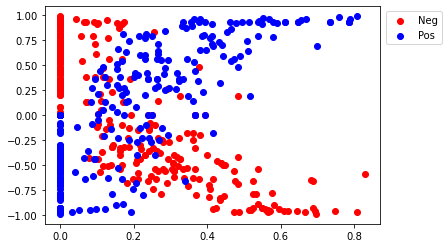

In [31]:
neg = stock['neg']
pos = stock['pos']
compound = stock['compound']


plt.scatter(neg, compound, c='r', label='Neg')
plt.scatter(pos, compound, c='b', label='Pos')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.show()

# As you can see the users of the WallStreetBets Reddit thread don't exactly have the same thoughts about the overall market sentiment right now. However, sentiment analysis is not very
accurate at this time and some comments analyzed may have nothing to do with the stock market at 